### Optimizing the SVM Classifier

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this notebook, I aim to tune parameters of the SVM Classification model using scikit-learn. 

#### Load Libraries and Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression

# visualization
import seaborn as sb
sb.set_style("white")

#### Build a predictive model and evaluate with 5-cross validation using support vector classifies (ref NB4) for details


In [3]:
data = pd.read_csv('cleaned_dataset.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)

data[:5]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Getting numpy array by .values function
array = data.values
features = array[:,1:31]
label = array[:,0]

#transforming the categorical variables into integers
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label)

# Normalizing features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(scaled_features)
features_pca = pca.transform(scaled_features)

In [11]:
# Spliting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(features_pca, label, test_size=0.2, random_state=2, stratify=label)

The classifier accuracy score is:  0.9385964912280702
Classsification Report For the Model: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



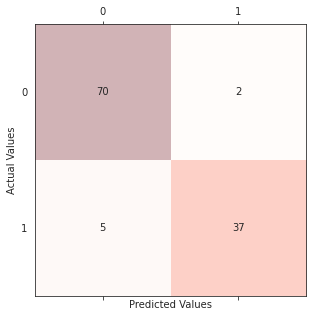

In [15]:
#Create an SVM classifier and train it
clf = SVC(probability=True)
clf.fit(X_train, y_train)

#Analyze accuracy of predictions.
classifier_score = clf.score(X_test, y_test)
print ('The classifier accuracy score is: ', str(classifier_score))

y_pred = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Classsification Report For the Model: ")
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,
            s=confusion_matrix[i, j], 
            va='center', ha='center')

plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

## Importance of optimizing a classifier

We can tune two key parameters of the SVM algorithm:
* the value of C (how much to relax the margin) 
* and the type of kernel. 

The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

Python scikit-learn provides two simple methods for algorithm parameter tuning:
 * Grid Search Parameter Tuning. 
 * Random Search Parameter Tuning.

In [16]:
# Train classifiers.
parameters = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': parameters}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'} with a score of 0.98


In [18]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



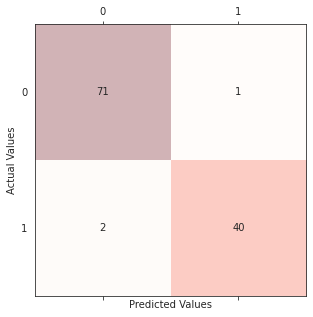

In [20]:

y_pred = clf.fit(X_train, y_train).predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,
            s=confusion_matrix[i, j], 
            va='center', ha='center')
        
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()


### Decision boundaries of different classifiers
Let's see the decision boundaries produced by the linear, Gaussian and polynomial classifiers.

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] # we only take the first two features.

#================================================================
# Create color maps
#================================================================
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#================================================================
# we create an instance of SVM and fit out data. 
# We do not scale ourdata since we want to plot the support vectors
#================================================================

C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'
    
    # create a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']



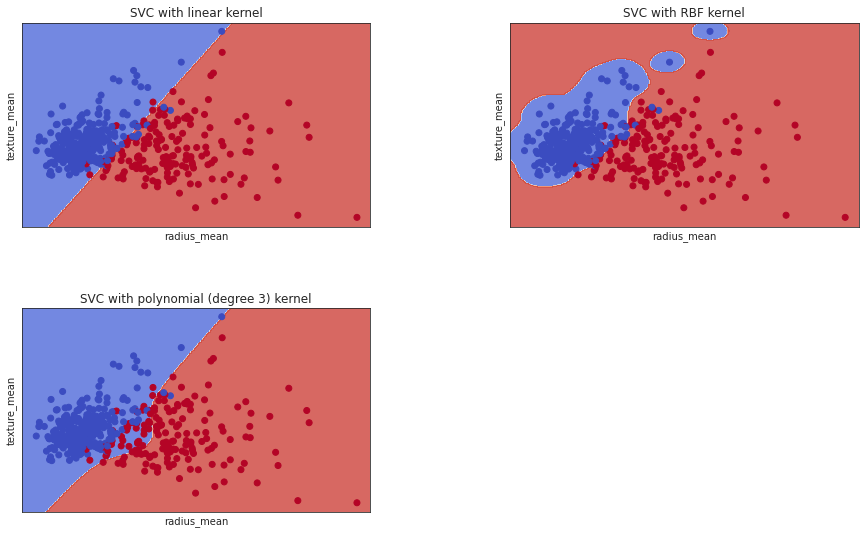

In [23]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Conclusion

This work demonstrates the modelling of breast cancer as classification task using Support Vector Machine 

The SVM performs better when the dataset is standardized so that all attributes have a mean value of zero and a standard deviation of one. We can calculate this from the entire training dataset and apply the same transform to the input attributes from the validation dataset.

Next Task:
1. Summary and conclusion of findings
2. Compare with other classification methods
   * Decision trees with tree.DecisionTreeClassifier();
   * K-nearest neighbors with neighbors.KNeighborsClassifier();
   * Random forests with ensemble.RandomForestClassifier();
   * Perceptron (both gradient and stochastic gradient) with mlxtend.classifier.Perceptron; and
   * Multilayer perceptron network (both gradient and stochastic gradient) with mlxtend.classifier.MultiLayerPerceptron.
    